In [65]:

import pickle
import matplotlib.pyplot as plt
import torch
import io, math
import numpy as np
from s2aenso.utils.utilities import *


colors_swin = ['#1410F2', '#068c08']
colors_vit = ['#D42E07', '#85068c', '#7976F4', '#B6B6D1', '#32a852', '#D67D68', '#f542ad', '#e9f542']

#model_num_vit = [(547313, "base_vit"), (573718, "no_tauxy_vit"), (627209, "prob_vit"), (558801, "2var") ]
#model_num_swinlstm = [(547314, "base_swin"), (573717, "no_tauxy_swin"), (630947, "prob_swin"), (558626, "2var")]

model_num_vit = [(767326, "1_2g_oc"), (765368, "1_2g_schedP"), (768661, "1_2g_schedP_var_scale"), (768663, "sst_var_scale") ]
model_num_swinlstm = [(765105, "1_2g_baseline"), (769026, "sst_baseline")] #, (754679, "1_1g_prob_decay"),]

specification = "Full_Region" # "Full_Region" or "Nino3.4"
dataset = "oras5" # "cesm2_picontrol" or "oras5" or "cesm2_lens"

data_vit = []
data_swinlstm = []

save_dir = f"C:/Users/felix/PycharmProjects/deeps2a-enso/scripts/evaluation/results/model_comparison/{dataset}/models_{specification}/"
create_directory(save_dir)


for model_num in model_num_vit:
    with open(f"C:/Users/felix/PycharmProjects/deeps2a-enso/scripts/evaluation/results/unprocessed/{dataset}/results_vit_{model_num[0]}_{model_num[1]}.pkl", 'rb') as file:
        cfg_vit = CPU_Unpickler(file).load()
        data_vit.append((cfg_vit, model_num[1]))


for model_num in model_num_swinlstm:
    print("Model number: ", model_num)
    with open(f"C:/Users/felix/PycharmProjects/deeps2a-enso/scripts/evaluation/results/unprocessed/{dataset}/results_swinlstm_{model_num[0]}_{model_num[1]}.pkl", 'rb') as file:   
        cfg_swin = CPU_Unpickler(file).load()
        data_swinlstm.append((cfg_swin, model_num[1]))

Model number:  (765105, '1_2g_baseline')
Model number:  (769026, 'sst_baseline')


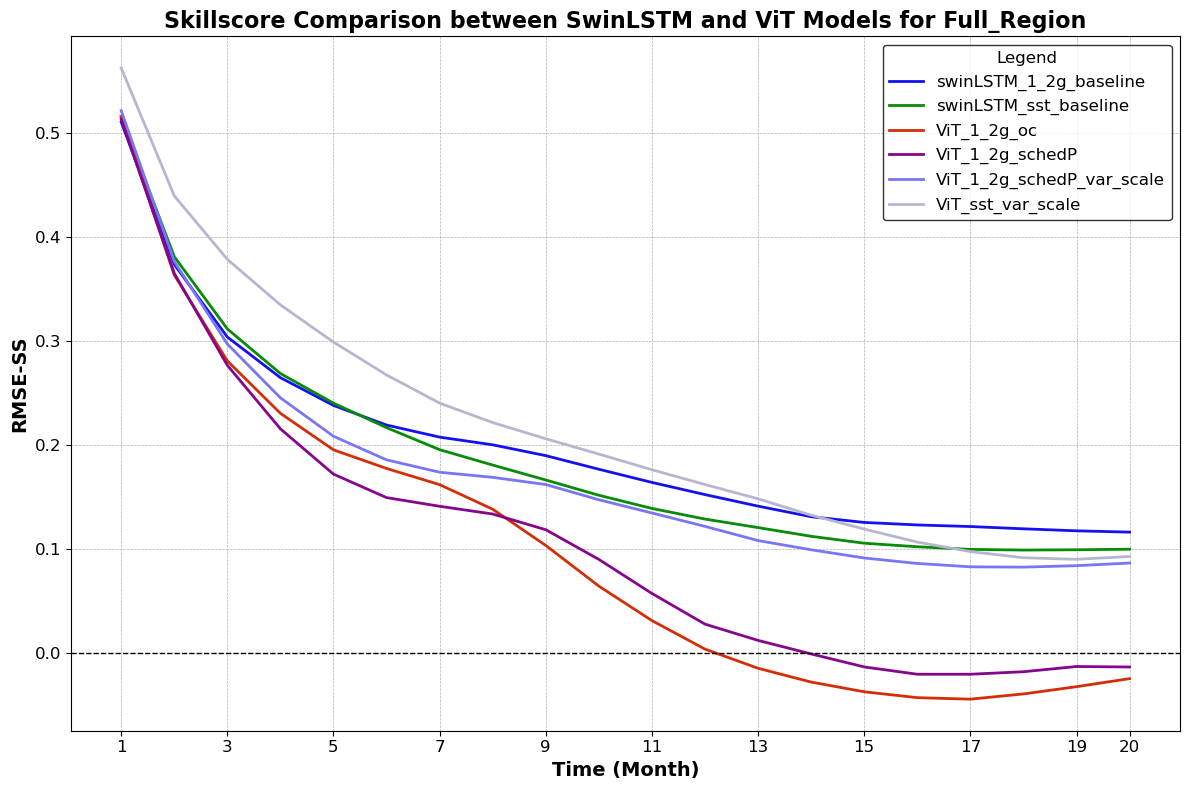

In [66]:
# ===========================================================================================================================
# Skillscore Comparison
# ===========================================================================================================================

nino_index = "" # 3i 34i 4i

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

for i, cfg in enumerate(model_num_swinlstm):
    ax.plot(data_swinlstm[i][0]["skillscore"]["total"]["skillscore_mean" + nino_index], label=f'swinLSTM_{cfg[1]}', color=colors_swin[i], linestyle='-', linewidth=2)

for i, cfg in enumerate(model_num_vit):
    ax.plot(data_vit[i][0]["skillscore"]["total"]["skillscore_mean" + nino_index], label=f'ViT_{cfg[1]}', color=colors_vit[i], linestyle='-', linewidth=2)

# Add a dashed line at y = 0
ax.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Add grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize the legend
legend = ax.legend(loc='best', fontsize='large', title='Legend', title_fontsize='large')
legend.get_frame().set_edgecolor('black')

# Add labels and title
ax.set_xlabel('Time (Month)', fontsize=14, fontweight='bold')
ax.set_ylabel('RMSE-SS', fontsize=14, fontweight='bold')
ax.set_title(f'Skillscore Comparison between SwinLSTM and ViT Models for {specification}', fontsize=16, fontweight='bold')

# Customize the x-axis labels to start at 1 and end at 20
num_points = len(data_swinlstm[0][0]["skillscore"]["total"]["skillscore_mean"])
x_ticks = list(range(0, num_points, max(1, num_points // 10)))

# Ensure the last month (20) is included
if (num_points - 1) not in x_ticks:
    x_ticks.append(num_points - 1)

ax.set_xticks(x_ticks)
ax.set_xticklabels(list(range(1, 20, 2)) + [20])

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Show plot
plt.tight_layout()
plt.show()
fig.savefig(f'{save_dir}/skillscore_comparison.png')

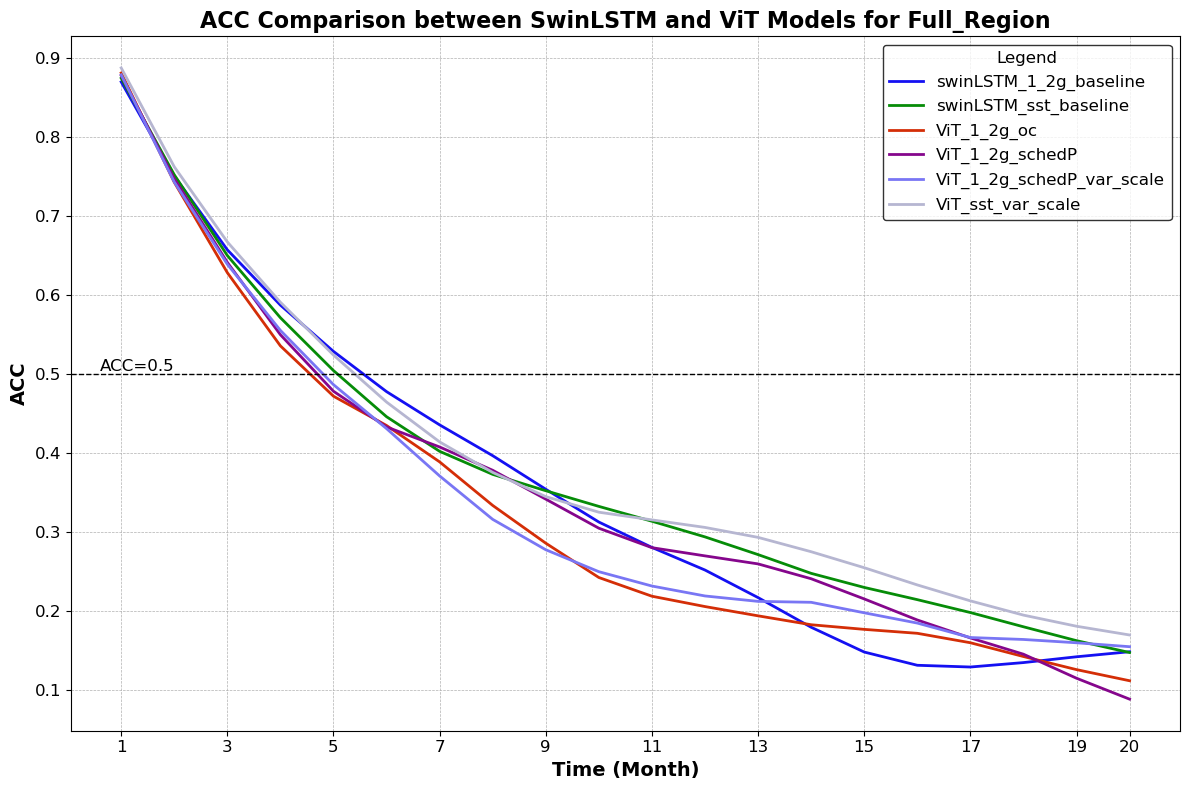

In [67]:
# ===========================================================================================================================
# ACC Comparison
# ===========================================================================================================================

nino_index = "" # 3i 34i 4i

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

for i, cfg in enumerate(model_num_swinlstm):
    ax.plot(data_swinlstm[i][0]["acc"]["total"]["acc_mean" + nino_index], label=f'swinLSTM_{cfg[1]}', color=colors_swin[i], linestyle='-', linewidth=2)


for i, cfg in enumerate(model_num_vit):
    ax.plot(data_vit[i][0]["acc"]["total"]["acc_mean" + nino_index], label=f'ViT_{cfg[1]}', color=colors_vit[i], linestyle='-', linewidth=2)

# Add a dashed line at y = 0.5 with a label
ax.axhline(y=0.5, color='black', linestyle='--', linewidth=1)
ax.text(x=1, y=0.5, s='ACC=0.5', color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='right')

# Add grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize the legend
legend = ax.legend(loc='best', fontsize='large', title='Legend', title_fontsize='large')
legend.get_frame().set_edgecolor('black')

# Add labels and title
ax.set_xlabel('Time (Month)', fontsize=14, fontweight='bold')
ax.set_ylabel('ACC', fontsize=14, fontweight='bold')
ax.set_title(f'ACC Comparison between SwinLSTM and ViT Models for {specification}', fontsize=16, fontweight='bold')

# Customize the x-axis labels to start at 1 and end at 20
num_points = len(data_swinlstm[0][0]["acc"]["total"]["acc_mean"])
x_ticks = list(range(0, num_points, max(1, num_points // 10)))

# Ensure the last month (20) is included
if (num_points - 1) not in x_ticks:
    x_ticks.append(num_points - 1)

ax.set_xticks(x_ticks)
ax.set_xticklabels(list(range(1, 20, 2)) + [20])

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Show plot
plt.tight_layout()
plt.show()
fig.savefig(f'{save_dir}/acc_comparison.png')

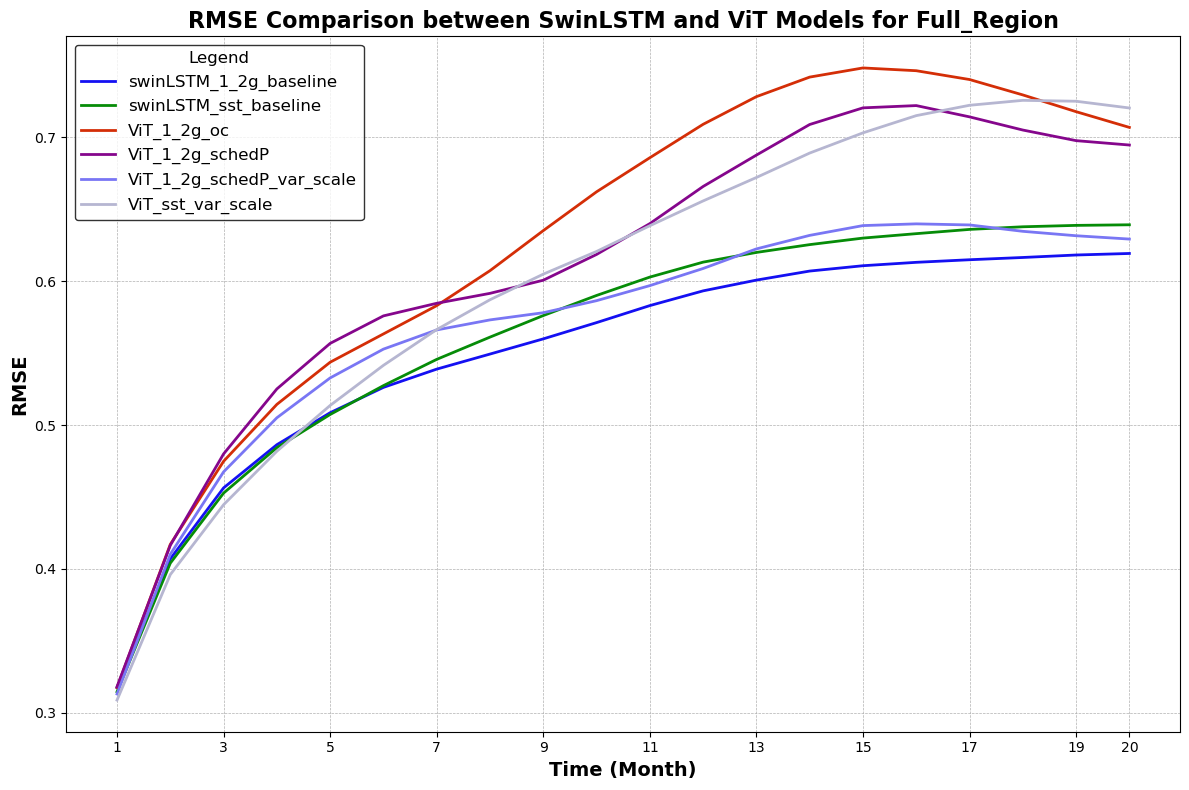

In [68]:
# ===========================================================================================================================
# RMSE Comparison
# ===========================================================================================================================

nino_index_ = "nino_34"
nino_index = nino_index_.split("_") if nino_index_ != "" else ""
nino_index[0] = nino_index[0] + "_" if len(nino_index) > 0 else ""
print(nino_index)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

for i, cfg in enumerate(model_num_swinlstm):
    ax.plot(data_swinlstm[i][0]["loss"]["total"][nino_index[0] + "rmse" + "_" + nino_index[1] + "_l"], label=f'swinLSTM_{cfg[1]}', color=colors_swin[i], linestyle='-', linewidth=2)

for i, cfg in enumerate(model_num_vit):
    ax.plot(data_vit[i][0]["loss"]["total"][nino_index[0] + "rmse" + "_" + nino_index[1] + "_l"], label=f'ViT_{cfg[1]}', color=colors_vit[i], linestyle='-', linewidth=2)


# Add grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize the legend
legend = ax.legend(loc='best', fontsize='large', title='Legend', title_fontsize='large')
legend.get_frame().set_edgecolor('black')

# Add labels and title
ax.set_xlabel('Time (Month)', fontsize=14, fontweight='bold')
ax.set_ylabel('RMSE', fontsize=14, fontweight='bold')
ax.set_title(f'RMSE Comparison between SwinLSTM and ViT Models for {specification}', fontsize=16, fontweight='bold')

# Customize the x-axis labels to start at 1 and end at 20
num_points = len(data_swinlstm[0][0]["loss"]["total"]["rmse"])
x_ticks = list(range(0, num_points, max(1, num_points // 10)))

# Ensure the last month (20) is included
if (num_points - 1) not in x_ticks:
    x_ticks.append(num_points - 1)

ax.set_xticks(x_ticks)
ax.set_xticklabels(list(range(1, 20, 2)) + [20])

# Show plot
plt.tight_layout()
plt.show()
fig.savefig(f'{save_dir}/rmse_comparison.png')